In [1]:
include("../src/ha-trade.jl")

using Plots
using MINPACK
using FiniteDifferences
gr(fmt=:png); # setting for easier display in jupyter notebooks

 28.615671 seconds (61.62 M allocations: 3.272 GiB, 4.16% gc time, 99.65% compilation time)


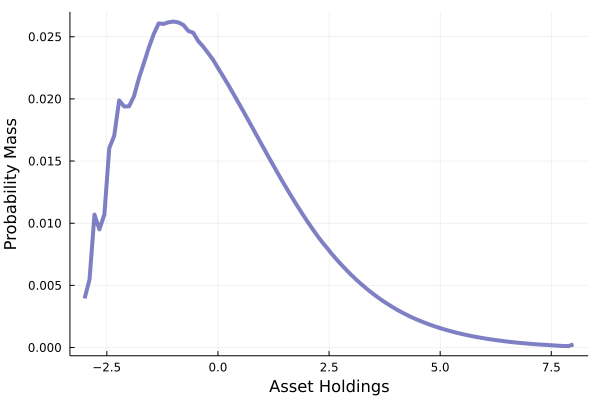

In [2]:
params = model_params(ρ = 0.20, σ = 0.3919, Nshocks = 10, Na = 100, ϕ = 3.0, amax = 8, σa = 0.005, γ = 3.0, ϑ = 0.0, σw = 0.001)
# parameter set to compare to previous notebooks

Pces = 1.0
W = 1.0
τ_rev = 0.0
R = 1.029

@time hh, dist = compute_eq(Pces, W, τ_rev, R, params);

adist = get_distribution(dist.state_index, dist.L);

plot(params.agrid, adist, alpha = 0.5, lw = 4,
    color = "dark blue", ylabel = "Probability Mass", xlabel = "Asset Holdings", label = false)

In [3]:
@btime hh, dist = compute_eq(Pces, W, τ_rev, R, params);

  69.688 ms (14739 allocations: 118.40 MiB)


### No Labor Supply, Financial Autarky Case

In [4]:
W = [1.0 , 1.0]

τ_revenue = [0.0,  0.0]

R = [1.029, 1.029]


@time ha_trade_equilibrium(W, τ_revenue, R, params, trade_params())

  1.866092 seconds (4.69 M allocations: 503.380 MiB, 4.18% gc time, 88.63% compilation time)


6-element Vector{Float64}:
 0.09814031799169931
 0.09814031799169931
 0.0
 0.0
 0.02591530939040435
 0.02591530939040435

In [5]:
haparams =  model_params(ρ = 0.20, σ = 0.3919, Nshocks = 10, Na = 100, ϕ = 3.0, amax = 8, σa = 0.005, γ = 3.0, ϑ = 0.0, σw = 0.001)
trdparams = trade_params(d = [1.0 1.25; 1.25 1.0] )

Ncntry = trdparams.Ncntry

f(x) = ha_trade_equilibrium(x, haparams , trdparams )

function f!(fvec, x)
    
    fvec .= f(x)

end

function j!(jvec, x)
    
    jvec .= jacobian(central_fdm(2, 1), f, x)[1]

end

j! (generic function with 1 method)

In [8]:
initial_x = [W; τ_revenue; R]

f(initial_x)

6-element Vector{Float64}:
 0.16048936596720909
 0.16048936596720909
 0.0
 0.0
 0.02591530939040435
 0.02591530939040435

In [9]:
@time jacobian(central_fdm(2, 1), f, initial_x)[1]

  6.710428 seconds (9.06 M allocations: 9.139 GiB, 8.55% gc time)


6×6 Matrix{Float64}:
  1.16331   -2.24947  -0.661376  -0.338624   -8.05646e-6    4.02823e-6
 -2.65183    1.56567  -0.338624  -0.661376    4.02823e-6   -8.05646e-6
  0.0        0.0       1.0        0.0         0.0           0.0
  0.0        0.0       0.0        1.0         0.0           0.0
  2.48702    0.0      -2.84964    0.0       143.099         0.0
  0.802691   1.68433   0.0       -2.84964     0.0         143.099

In [9]:
initial_x = [W; τ_revenue; R]

n = length(initial_x)
diag_adjust = n - 1

sol = fsolve(f!, initial_x, show_trace = true, method = :hybr;
      ml=diag_adjust, mu=diag_adjust,
      diag=ones(n),
      mode= 1,
      tol=1e-5,
       )

Iter     f(x) inf-norm    Step 2-norm      Step time
------   --------------   --------------   --------------
     1     1.604894e-01     0.000000e+00         0.388000
     2     7.021276e-03     4.368039e-02         1.644000
     3     1.385839e-03     4.814565e-09         0.146000
     4     4.653895e-06     2.911562e-10         0.147000
     5     2.634929e-08     3.305692e-15         0.140000


Results of Nonlinear Solver Algorithm
 * Algorithm: Modified Powell
 * Starting Point: [1.0, 1.0, 0.0, 0.0, 1.029, 1.029]
 * Zero: [1.147758709662011, 1.1477587096636248, 5.021626656275687e-22, -1.3705020272736817e-22, 1.0263120720331431, 1.026312072033827]
 * Inf-norm of residuals: 0.000000
 * Convergence: true
 * Message: algorithm estimates that the relative error between x and the solution is at most tol
 * Total time: 2.465000 seconds
 * Function Calls: 5
 * Jacobian Calls (df/dx): 1

In [11]:
initial_x = [W; τ_revenue; R]

n = length(initial_x)
diag_adjust = n - 1

sol = fsolve(f!, j!, initial_x, show_trace = true, method = :hybr;
      tol=1e-5,
       )

Iter     f(x) inf-norm    Step 2-norm      Step time
------   --------------   --------------   --------------
     1     1.604894e-01     0.000000e+00         0.181000
     2     7.021575e-03     4.368041e-02         6.538000
     3     1.385905e-03     4.815236e-09         0.147000
     4     4.656880e-06     2.911934e-10         0.174000
     5     2.640042e-08     3.310454e-15         0.146000


Results of Nonlinear Solver Algorithm
 * Algorithm: Modified Powell (User Jac, Expert)
 * Starting Point: [1.0, 1.0, 0.0, 0.0, 1.029, 1.029]
 * Zero: [1.1477587096710031, 1.1477587096624169, -3.5029458500197193e-22, -1.7039970806042888e-22, 1.0263120720341348, 1.0263120720339811]
 * Inf-norm of residuals: 0.000000
 * Convergence: true
 * Message: algorithm estimates that the relative error between x and the solution is at most tol
 * Total time: 7.186000 seconds
 * Function Calls: 5
 * Jacobian Calls (df/dx): 1

### No Labor Supply, Financial Integration Case

using multiple dispatch here to seamlessly compute this case. Here is a first look...if you pass a scalar R to the function it returns 2* Ncntry + 1 conditions (demand, tariff revenue, and world bond market clearing). But if you look above -> 3*2*Ncountry conditions (demand, tariff, and each countries bond market). 

In [10]:
W = [1.0 , 1.0]

τ_revenue = [0.0,  0.0]

R = 1.029

@time ha_trade_equilibrium(W, τ_revenue, R, params, trade_params())

  0.188917 seconds (251.63 k allocations: 259.965 MiB, 13.69% gc time)


5-element Vector{Float64}:
 0.09814031799169931
 0.09814031799169931
 0.0
 0.0
 0.0518306187808087

Then here is a second look. We don't need to modify the function ``f(x)`` above, because with dispatching, the ``ha_trade_equilibrium`` checks the length of x and then appropriately determines which setting is relevant. 

In [11]:
initial_x = [W; τ_revenue; 1.029]

n = length(initial_x)
diag_adjust = n - 1

sol = fsolve(f!, initial_x, show_trace = true, method = :hybr;
      ml=diag_adjust, mu=diag_adjust,
      diag=ones(n),
      mode= 1,
      tol=1e-5,
       )

Iter     f(x) inf-norm    Step 2-norm      Step time
------   --------------   --------------   --------------
     1     1.604894e-01     0.000000e+00         0.203000
     2     1.404212e-02     4.367283e-02         1.020000
     3     2.771556e-03     2.407297e-09         0.147000
     4     9.307732e-06     1.455744e-10         0.142000
     5     5.261855e-08     1.652869e-15         0.135000


Results of Nonlinear Solver Algorithm
 * Algorithm: Modified Powell
 * Starting Point: [1.0, 1.0, 0.0, 0.0, 1.029]
 * Zero: [1.147758709662011, 1.1477587096636246, -2.4529678984052292e-22, 5.157706376596586e-22, 1.0263120720334888]
 * Inf-norm of residuals: 0.000000
 * Convergence: true
 * Message: algorithm estimates that the relative error between x and the solution is at most tol
 * Total time: 1.648000 seconds
 * Function Calls: 5
 * Jacobian Calls (df/dx): 1